In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
og = pd.read_csv('datasets/ftse350_oil_gas.csv')
leisure = pd.read_csv('datasets/ftse_300_travel_leisure_idx.csv')
bp = pd.read_csv('cleaned-datasets/bp_stock.csv')

In [54]:
og.Date = pd.to_datetime(og.Date)
og = og.sort_values(by='Date')
og.reset_index(inplace=True)

In [55]:
og.Price = og.Price.str.replace(",", "").astype(float)

In [56]:
og

,index,Date,Price,Open,High,Low,Vol.,Change %
0,1381,2010-07-30,6901.56,"7,009.90","7,017.20","6,901.56",NaN,-1.39%
1,1380,2010-08-02,7118.48,"6,925.50","7,132.50","6,925.50",NaN,3.14%
2,1379,2010-08-03,7157.40,"7,077.00","7,157.40","7,054.85",NaN,0.55%
3,1378,2010-08-04,7150.00,"7,110.05","7,191.05","7,045.25",NaN,-0.10%
4,1377,2010-08-05,7108.47,"7,149.30","7,242.10","7,089.95",NaN,-0.58%
...,...,...,...,...,...,...,...,...
1377,4,2015-12-23,5742.50,"5,476.28","5,757.30","5,476.28",NaN,4.86%
1378,3,2015-12-24,5782.67,"5,742.50","5,818.18","5,742.50",NaN,0.70%
1379,2,2015-12-29,5783.48,"5,782.67","5,797.14","5,685.46",NaN,0.01%
1380,1,2015-12-30,5708.83,"5,783.48","5,783.48","5,695.62",NaN,-1.29%


In [57]:
leisure.Date = pd.to_datetime(leisure.Date)

In [58]:
leisure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1009 non-null   datetime64[ns]
 1   Price     1009 non-null   float64       
 2   Open      1009 non-null   float64       
 3   High      1009 non-null   float64       
 4   Low       1009 non-null   float64       
 5   Vol.      0 non-null      float64       
 6   Change %  1009 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 55.3+ KB


In [59]:
oly_stocks = pd.read_csv('cleaned-datasets/olympic_year_stock_price.csv')
nonoly_stocks = pd.read_csv('cleaned-datasets/nonolympic_year_stock_price.csv')

In [60]:
stocks = pd.concat([oly_stocks, nonoly_stocks]).sort_values(by='Date')
stocks.Date = pd.to_datetime(stocks.Date)

In [61]:
bp.Date = pd.to_datetime(bp.Date)

In [62]:
stocks_12 = stocks[stocks.Date.dt.year == 2012]
stocks_oly = stocks_12[stocks_12.Date.dt.month.isin([7, 8])]

In [63]:
og_12 = og[og.Date.dt.year == 2012]
og_oly = og_12[og_12.Date.dt.month.isin([7, 8])]

In [64]:
leisure_12 = leisure[leisure.Date.dt.year == 2012]
leisure_oly = leisure_12[leisure_12.Date.dt.month.isin([7, 8])]

In [65]:
bp_12 = bp[bp.Date.dt.year == 2012]
bp_oly = bp_12[bp_12.Date.dt.month.isin([7, 8])]

In [66]:
bp_oly

,Unnamed: 0,index,Date,Close,Open,High,Low,Vol.,Change %
883,883,886,2012-07-02,432.50,427.30,432.50,421.95,24.68M,2.50%
884,884,885,2012-07-03,432.90,430.00,433.35,427.25,22.87M,0.09%
885,885,884,2012-07-04,430.55,432.55,433.68,422.45,19.25M,-0.54%
886,886,883,2012-07-05,434.20,430.10,439.85,429.55,43.75M,0.85%
887,887,882,2012-07-06,428.20,432.15,437.60,426.95,28.44M,-1.38%
888,888,881,2012-07-09,423.95,426.00,428.42,420.15,28.39M,-0.99%
889,889,880,2012-07-10,428.50,425.25,430.40,422.60,17.51M,1.07%
890,890,879,2012-07-11,432.55,425.90,432.80,423.80,16.54M,0.95%
891,891,878,2012-07-12,435.10,431.35,435.90,428.60,28.41M,0.59%
892,892,877,2012-07-13,438.10,436.50,442.00,435.60,26.86M,0.69%


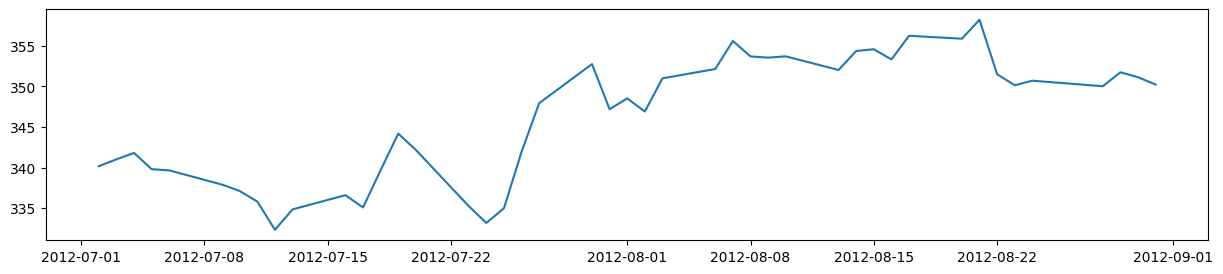

In [67]:
plt.figure(figsize=(15, 3))
plt.plot(leisure_oly.Date, leisure_oly.Price)

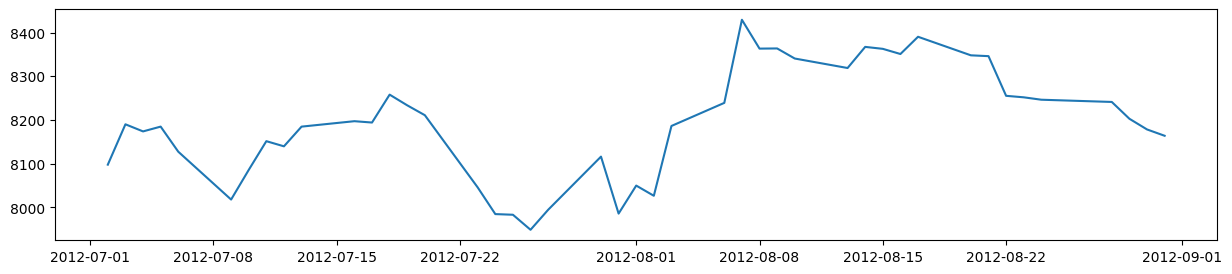

In [68]:
plt.figure(figsize=(15, 3))
plt.plot(og_oly.Date, og_oly.Price)

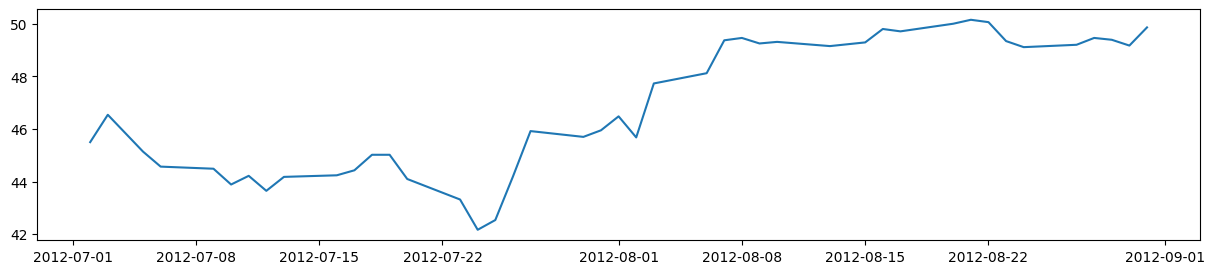

In [69]:
plt.figure(figsize=(15, 3))
plt.plot(stocks_oly.Date, stocks_oly.tte_close)

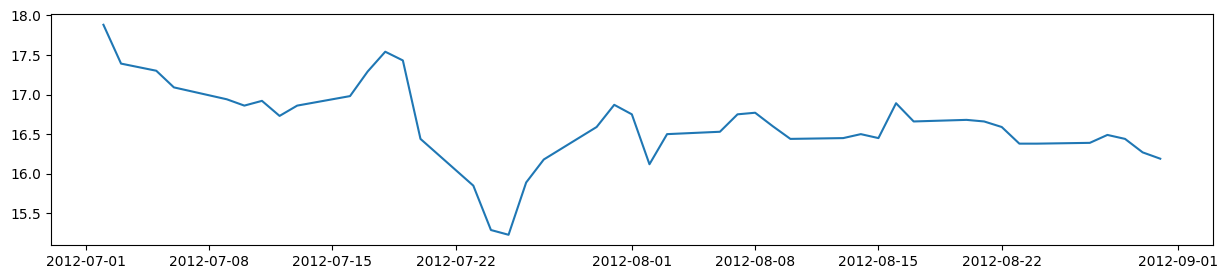

In [70]:
plt.figure(figsize=(15, 3))
plt.plot(stocks_oly.Date, stocks_oly.edf_close)

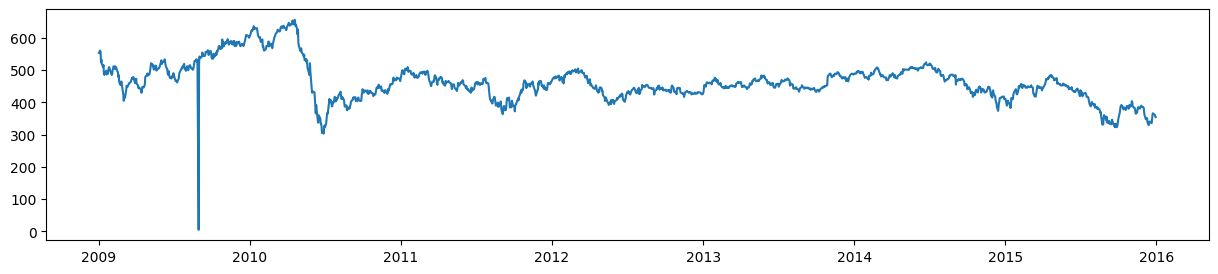

In [71]:
plt.figure(figsize=(15, 3))
plt.plot(bp.Date, bp.Close)

In [72]:
idx_corr = stocks.merge(og[['Date', 'Price']], on='Date')
idx_corr = idx_corr.merge(leisure[['Date', 'Price']], on='Date')
idx_corr = idx_corr.merge(bp[['Date', 'Close']].rename(columns={'Close': 'Price'}), on='Date')

idx_corr_12 = stocks_12.merge(og_12[['Date', 'Price']], on='Date')
idx_corr_12 = idx_corr_12.merge(leisure_12[['Date', 'Price']], on='Date')
idx_corr_12 = idx_corr_12.merge(bp_12[['Date', 'Close']].rename(columns={'Close': 'Price'}), on='Date')

idx_corr_oly = stocks_oly.merge(og_oly[['Date', 'Price']], on='Date')
idx_corr_oly = idx_corr_oly.merge(leisure_oly[['Date', 'Price']], on='Date')
idx_corr_oly = idx_corr_oly.merge(bp_oly[['Date', 'Close']].rename(columns={'Close': 'Price'}), on='Date')


In [73]:
idx_corr = idx_corr.rename(columns={'Price_x': 'oil_gas_idx', 'Price_y' : 'leisure_idx'})
idx_corr_12 = idx_corr_12.rename(columns={'Price_x': 'oil_gas_idx', 'Price_y' : 'leisure_idx'})
idx_corr_oly = idx_corr_oly.rename(columns={'Price_x': 'oil_gas_idx', 'Price_y' : 'leisure_idx'})


In [74]:
idx_corr = idx_corr.rename(columns={'Price' : 'bp_close'})
idx_corr_12 = idx_corr_12.rename(columns={'Price' : 'bp_close'})
idx_corr_oly = idx_corr_oly.rename(columns={'Price' : 'bp_close'})

In [75]:
idx_corr['is_olympic'] = (idx_corr.Date.dt.year == 2012).astype(int)
idx_corr['is_sum'] = (idx_corr.Date.dt.month.isin([7, 8])).astype(int)
idx_corr

,Unnamed: 0,Date,edf_close,edf_pct0,edf_vol,tte_close,tte_pct0,tte_vol,detrended_edf_close,detrended_tte_close,oil_gas_idx,leisure_idx,bp_close,is_olympic,is_sum
0,767,2012-01-26,17.66,-0.006795,1790.0,52.919998,-0.000378,2119.6,-8.06,-1.34,8687.06,317.96,476.75,1,0
1,768,2012-01-27,17.54,-0.022805,1450.0,52.900002,-0.004915,2173.7,-8.17,-1.36,8498.36,316.47,464.55,1,0
2,769,2012-01-30,17.14,0.028005,1440.0,52.639999,0.006269,2126.4,-8.56,-1.62,8395.76,312.97,458.45,1,0
3,770,2012-01-31,17.62,0.029512,2550.0,52.970001,0.006230,3533.9,-8.07,-1.28,8516.71,313.88,470.85,1,0
4,771,2012-02-01,18.14,0.003859,3010.0,53.299999,0.009193,2304.8,-7.54,-0.95,8655.49,320.25,483.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963,1740,2015-12-23,12.59,0.007149,3290.0,46.240002,-0.007569,2586.9,-4.93,-5.60,5742.50,649.13,360.40,0,0
964,1741,2015-12-24,12.68,-0.016562,409.6,45.889999,-0.011331,834.6,-4.83,-5.95,5782.67,649.77,365.95,0,0
965,1743,2015-12-29,12.49,0.000801,1610.0,45.849998,-0.015049,2315.8,-5.01,-5.99,5783.48,660.31,360.75,0,0
966,1744,2015-12-30,12.50,0.007200,1980.0,45.160000,-0.004650,1141.6,-4.99,-6.67,5708.83,660.25,355.15,0,0


<Axes: >

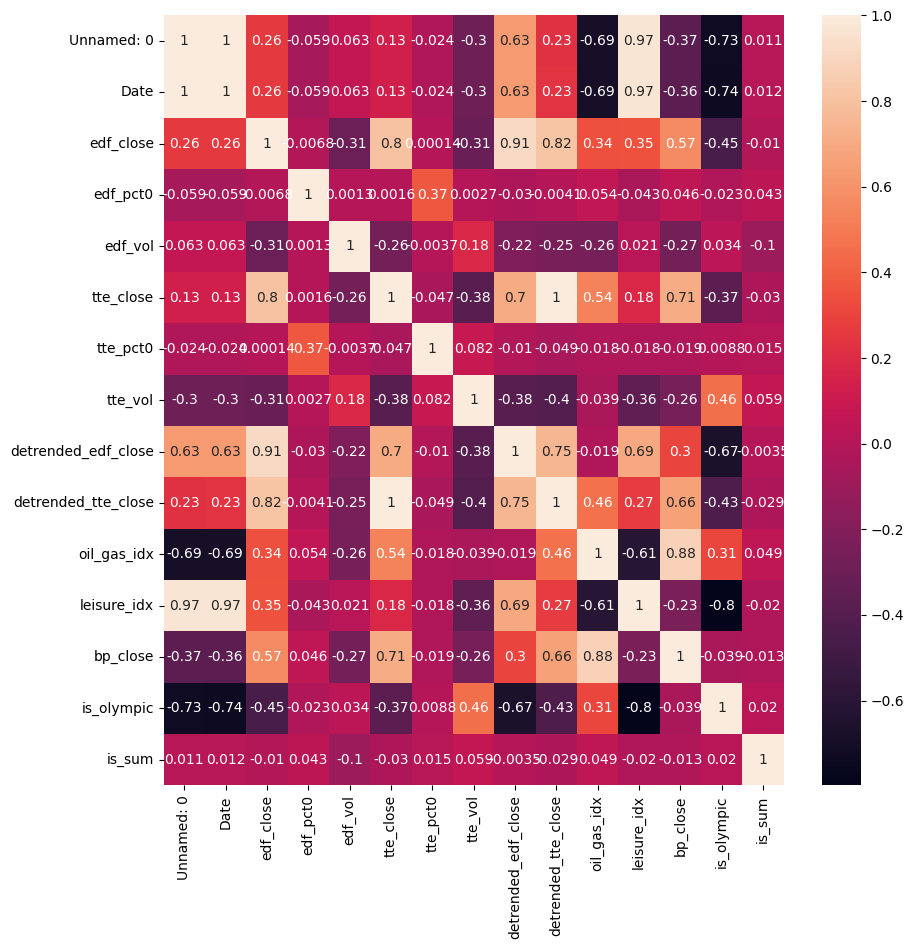

In [76]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(idx_corr.corr(), annot = True)

<Axes: >

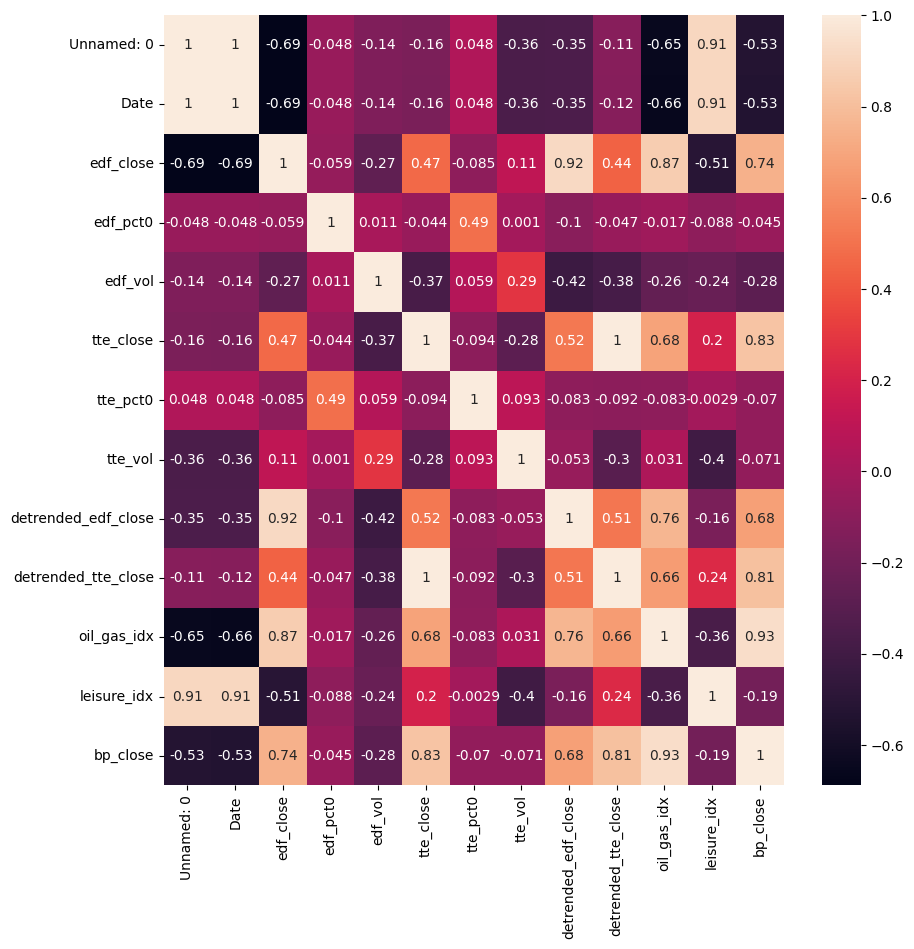

In [77]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(idx_corr_12.corr(), annot = True)

<Axes: >

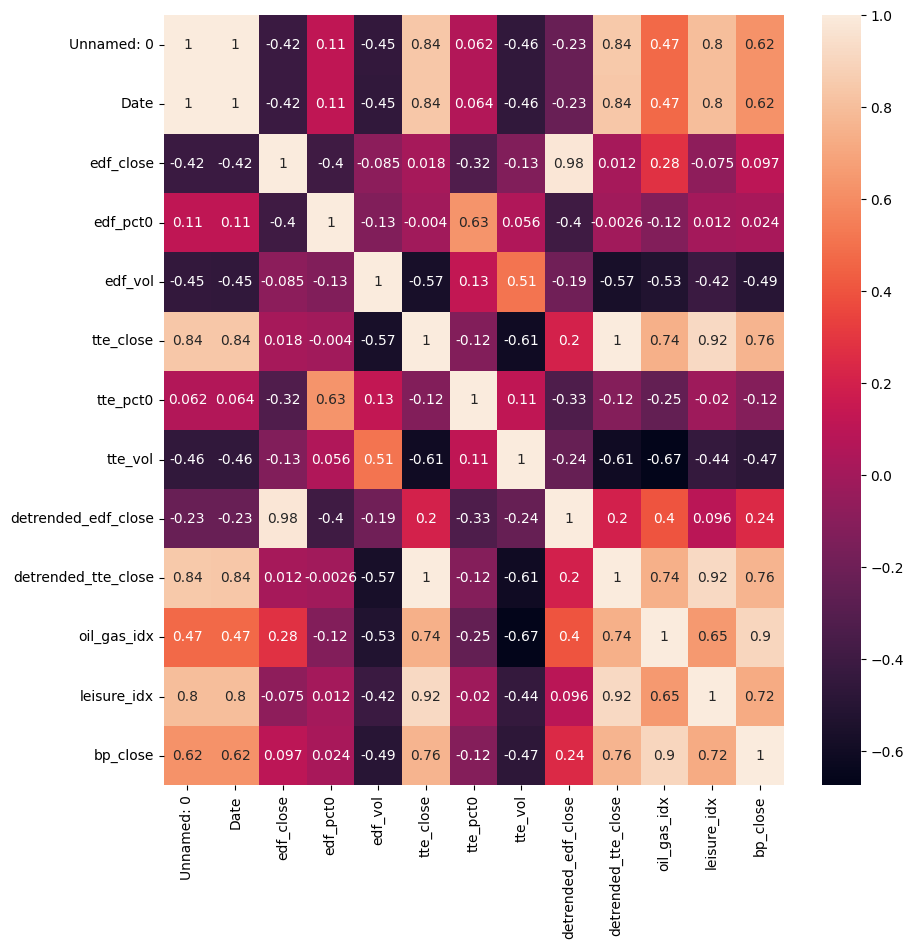

In [78]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(idx_corr_oly.corr(), annot = True)

In [79]:
beta_df = idx_corr[['Date', 'oil_gas_idx', 'leisure_idx', 'bp_close', 'tte_close', 'edf_close']]

In [80]:
beta_df['oil_gas_idx_pct'] = beta_df.oil_gas_idx.pct_change()
beta_df['leisure_idx_pct'] = beta_df.leisure_idx.pct_change()
beta_df['bp_pct'] = beta_df.bp_close.pct_change()
beta_df['tte_pct'] = beta_df.tte_close.pct_change()
beta_df['edf_pct'] = beta_df.edf_close.pct_change()

/var/folders/39/5w_n98y523q5v9f1rhz5n9y00000gn/T/ipykernel_72897/988366384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beta_df['oil_gas_idx_pct'] = beta_df.oil_gas_idx.pct_change()
/var/folders/39/5w_n98y523q5v9f1rhz5n9y00000gn/T/ipykernel_72897/988366384.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  beta_df['leisure_idx_pct'] = beta_df.leisure_idx.pct_change()
/var/folders/39/5w_n98y523q5v9f1rhz5n9y00000gn/T/ipykernel_72897/988366384.py:3: SettingWithCopyWarning: 
A value is trying to be set 

In [81]:
reidx = ['Date', 'oil_gas_idx', 'leisure_idx',	'oil_gas_idx_pct', 'leisure_idx_pct', 'bp_close', 'tte_close', 'edf_close', 'bp_pct', 'tte_pct', 'edf_pct']
beta_df = beta_df.reindex(columns=reidx)

In [82]:
beta_df.Date = pd.to_datetime(beta_df.Date)
beta_df

,Date,oil_gas_idx,leisure_idx,oil_gas_idx_pct,leisure_idx_pct,bp_close,tte_close,edf_close,bp_pct,tte_pct,edf_pct
0,2012-01-26,8687.06,317.96,NaN,NaN,476.75,52.919998,17.66,NaN,NaN,NaN
1,2012-01-27,8498.36,316.47,-0.021722,-0.004686,464.55,52.900002,17.54,-0.025590,-0.000378,-0.006795
2,2012-01-30,8395.76,312.97,-0.012073,-0.011060,458.45,52.639999,17.14,-0.013131,-0.004915,-0.022805
3,2012-01-31,8516.71,313.88,0.014406,0.002908,470.85,52.970001,17.62,0.027048,0.006269,0.028005
4,2012-02-01,8655.49,320.25,0.016295,0.020294,483.00,53.299999,18.14,0.025804,0.006230,0.029512
...,...,...,...,...,...,...,...,...,...,...,...
963,2015-12-23,5742.50,649.13,0.048613,0.010445,360.40,46.240002,12.59,0.044789,0.039802,0.043947
964,2015-12-24,5782.67,649.77,0.006995,0.000986,365.95,45.889999,12.68,0.015400,-0.007569,0.007149
965,2015-12-29,5783.48,660.31,0.000140,0.016221,360.75,45.849998,12.49,-0.014210,-0.000872,-0.014984
966,2015-12-30,5708.83,660.25,-0.012907,-0.000091,355.15,45.160000,12.50,-0.015523,-0.015049,0.000801


In [83]:
beta_df = beta_df[['Date', 'oil_gas_idx_pct', 'leisure_idx_pct', 'bp_pct', 'tte_pct', 'edf_pct']]
beta_df = beta_df[1:]
beta_df

,Date,oil_gas_idx_pct,leisure_idx_pct,bp_pct,tte_pct,edf_pct
1,2012-01-27,-0.021722,-0.004686,-0.025590,-0.000378,-0.006795
2,2012-01-30,-0.012073,-0.011060,-0.013131,-0.004915,-0.022805
3,2012-01-31,0.014406,0.002908,0.027048,0.006269,0.028005
4,2012-02-01,0.016295,0.020294,0.025804,0.006230,0.029512
5,2012-02-02,-0.006640,0.003685,-0.010559,0.009193,0.003859
...,...,...,...,...,...,...
963,2015-12-23,0.048613,0.010445,0.044789,0.039802,0.043947
964,2015-12-24,0.006995,0.000986,0.015400,-0.007569,0.007149
965,2015-12-29,0.000140,0.016221,-0.014210,-0.000872,-0.014984
966,2015-12-30,-0.012907,-0.000091,-0.015523,-0.015049,0.000801


In [84]:
def get_beta(date, df):
    m = df.cov()
    print(m)
    bp_og = m.loc['oil_gas_idx_pct','bp_pct'] / m.loc['oil_gas_idx_pct','oil_gas_idx_pct']
    tte_og = m.loc['oil_gas_idx_pct','tte_pct'] / m.loc['oil_gas_idx_pct','oil_gas_idx_pct']
    edf_og = m.loc['oil_gas_idx_pct','edf_pct'] / m.loc['oil_gas_idx_pct','oil_gas_idx_pct']
    bp_lei = m.loc['leisure_idx_pct','bp_pct'] / m.loc['leisure_idx_pct','leisure_idx_pct']
    tte_lei = m.loc['leisure_idx_pct','tte_pct'] / m.loc['leisure_idx_pct', 'leisure_idx_pct']
    edf_lei = m.loc['leisure_idx_pct','edf_pct'] / m.loc['leisure_idx_pct','leisure_idx_pct']
    
    
    return [date, bp_og, bp_lei, tte_og, tte_lei, edf_og, edf_lei]
    

In [85]:
BETA_COLS = ['date', 'bp/oil_gas', 'bp/leisure', 'tte/oil_gas', 'tte/leisure', 'edf/oil_gas', 'edf/leisure']
rolling_beta = pd.DataFrame(columns=BETA_COLS)
for i in range(len(beta_df) - 7):
    rolling_df = beta_df[i:i + 7]
    betas = get_beta(beta_df.Date.iloc[i+6], rolling_df)
    betas_df = pd.DataFrame([betas], columns=BETA_COLS)
    rolling_beta = pd.concat([rolling_beta, betas_df], ignore_index=True)

rolling_beta

/var/folders/39/5w_n98y523q5v9f1rhz5n9y00000gn/T/ipykernel_72897/2127560684.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rolling_beta = pd.concat([rolling_beta, betas_df], ignore_index=True)


                         Date  oil_gas_idx_pct  leisure_idx_pct        bp_pct  \
Date             7.464960e+28     1.958252e+12     1.306611e+12  2.827316e+12   
oil_gas_idx_pct  1.958252e+12     1.931819e-04     1.146707e-04  2.819747e-04   
leisure_idx_pct  1.306611e+12     1.146707e-04     1.756409e-04  1.711642e-04   
bp_pct           2.827316e+12     2.819747e-04     1.711642e-04  4.208535e-04   
tte_pct          6.927384e+10     3.636764e-05     5.810612e-05  4.794146e-05   
edf_pct          1.140219e+12     2.255370e-04     1.924780e-04  3.285974e-04   

                      tte_pct       edf_pct  
Date             6.927384e+10  1.140219e+12  
oil_gas_idx_pct  3.636764e-05  2.255370e-04  
leisure_idx_pct  5.810612e-05  1.924780e-04  
bp_pct           4.794146e-05  3.285974e-04  
tte_pct          3.744651e-05  8.644158e-05  
edf_pct          8.644158e-05  3.648776e-04  
                         Date  oil_gas_idx_pct  leisure_idx_pct        bp_pct  \
Date             6.682917e+28

,date,bp/oil_gas,bp/leisure,tte/oil_gas,tte/leisure,edf/oil_gas,edf/leisure
0,2012-02-06,1.459633,0.974512,0.188256,0.330823,1.167486,1.095861
1,2012-02-07,1.398712,0.797800,0.243050,0.268608,1.584738,0.976679
2,2012-02-08,1.482371,0.533758,0.017973,0.166445,1.286458,0.580706
3,2012-02-09,1.257795,0.603353,-0.065537,0.178248,0.793940,0.679405
4,2012-02-10,0.932947,0.389520,0.460323,0.296135,0.674171,0.505635
...,...,...,...,...,...,...,...
955,2015-12-22,0.939030,1.116096,0.341833,0.704571,0.534291,0.932213
956,2015-12-23,0.862978,1.030724,0.697111,1.057260,0.502971,0.714765
957,2015-12-24,0.882360,1.179682,0.676860,1.081471,0.506458,0.867440
958,2015-12-29,0.949235,-0.111988,0.652945,0.664380,0.564068,-0.237177


In [95]:
rolling_beta_small = rolling_beta[rolling_beta.date.dt.year < 2014]
rolling_beta_small

,date,bp/oil_gas,bp/leisure,tte/oil_gas,tte/leisure,edf/oil_gas,edf/leisure
0,2012-02-06,1.459633,0.974512,0.188256,0.330823,1.167486,1.095861
1,2012-02-07,1.398712,0.797800,0.243050,0.268608,1.584738,0.976679
2,2012-02-08,1.482371,0.533758,0.017973,0.166445,1.286458,0.580706
3,2012-02-09,1.257795,0.603353,-0.065537,0.178248,0.793940,0.679405
4,2012-02-10,0.932947,0.389520,0.460323,0.296135,0.674171,0.505635
...,...,...,...,...,...,...,...
462,2013-12-23,1.381996,1.210610,0.326562,0.014490,0.104344,-0.198838
463,2013-12-24,1.500227,1.085411,0.163528,-0.014684,-0.034363,-0.374217
464,2013-12-27,1.475355,1.033280,-0.021510,-0.034566,-0.192170,-0.418446
465,2013-12-30,1.147618,0.787219,0.069036,0.055808,-0.391888,-0.535670


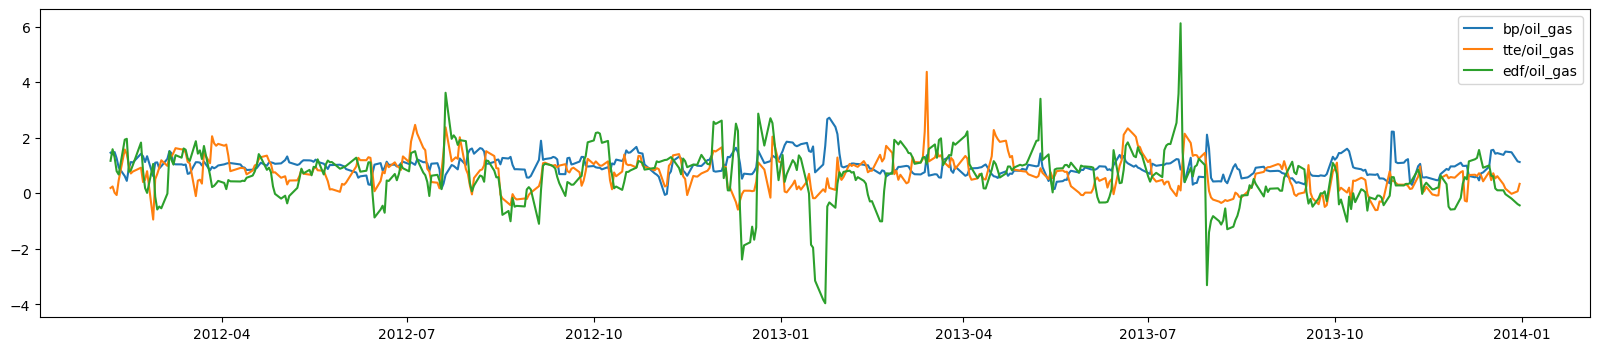

In [96]:
plt.figure(figsize=(20, 4))
plt.plot(rolling_beta_small.date, rolling_beta_small['bp/oil_gas'], label='bp/oil_gas')
plt.plot(rolling_beta_small.date, rolling_beta_small['tte/oil_gas'], label='tte/oil_gas')
plt.plot(rolling_beta_small.date, rolling_beta_small['edf/oil_gas'], label='edf/oil_gas')
plt.legend()

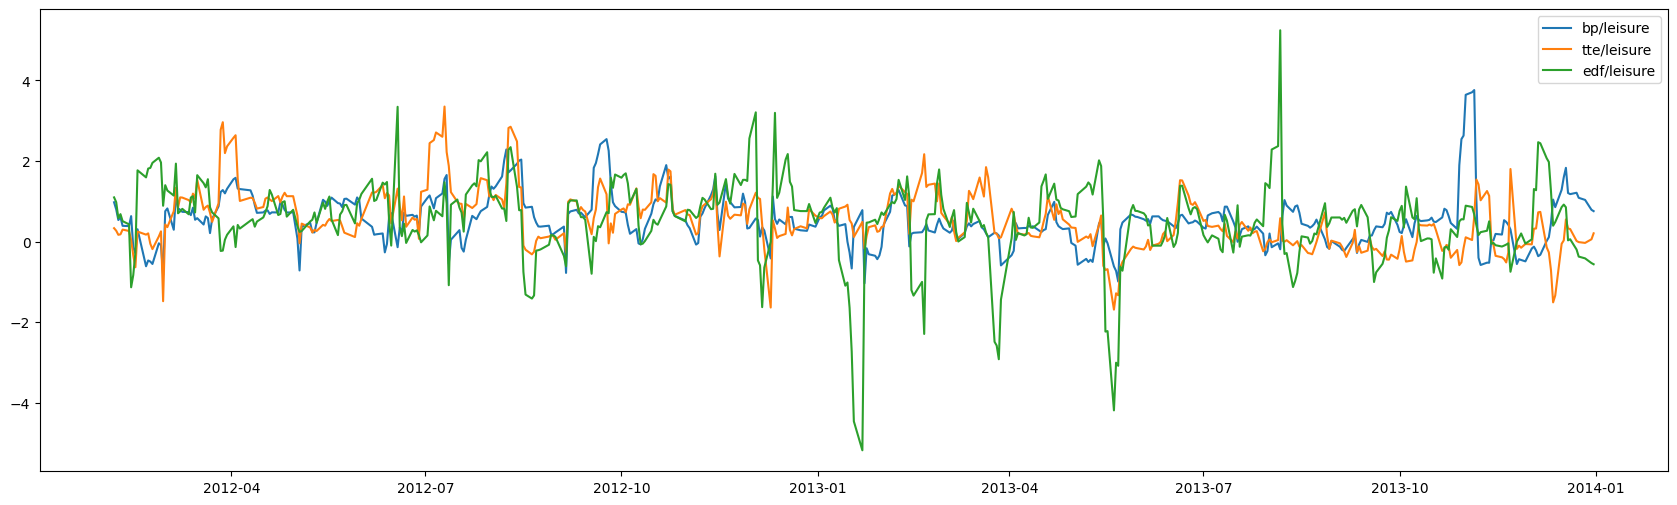

In [98]:
plt.figure(figsize=(21, 6))
plt.plot(rolling_beta_small.date, rolling_beta_small['bp/leisure'], label='bp/leisure')
plt.plot(rolling_beta_small.date, rolling_beta_small['tte/leisure'], label='tte/leisure')
plt.plot(rolling_beta_small.date, rolling_beta_small['edf/leisure'], label='edf/leisure')
plt.legend()

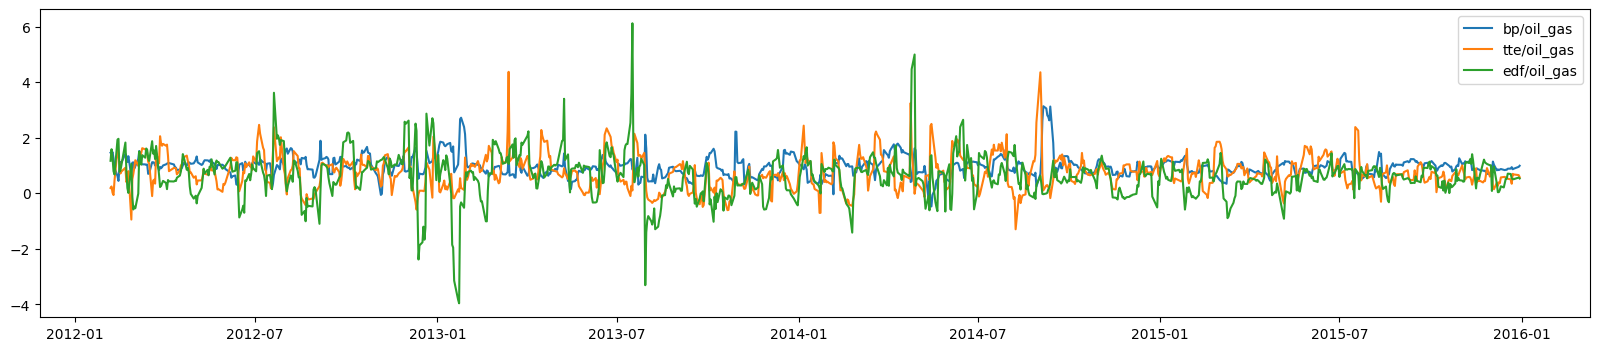

In [87]:
plt.figure(figsize=(20, 4))
plt.plot(rolling_beta.date, rolling_beta['bp/oil_gas'], label='bp/oil_gas')
plt.plot(rolling_beta.date, rolling_beta['tte/oil_gas'], label='tte/oil_gas')
plt.plot(rolling_beta.date, rolling_beta['edf/oil_gas'], label='edf/oil_gas')
plt.legend()

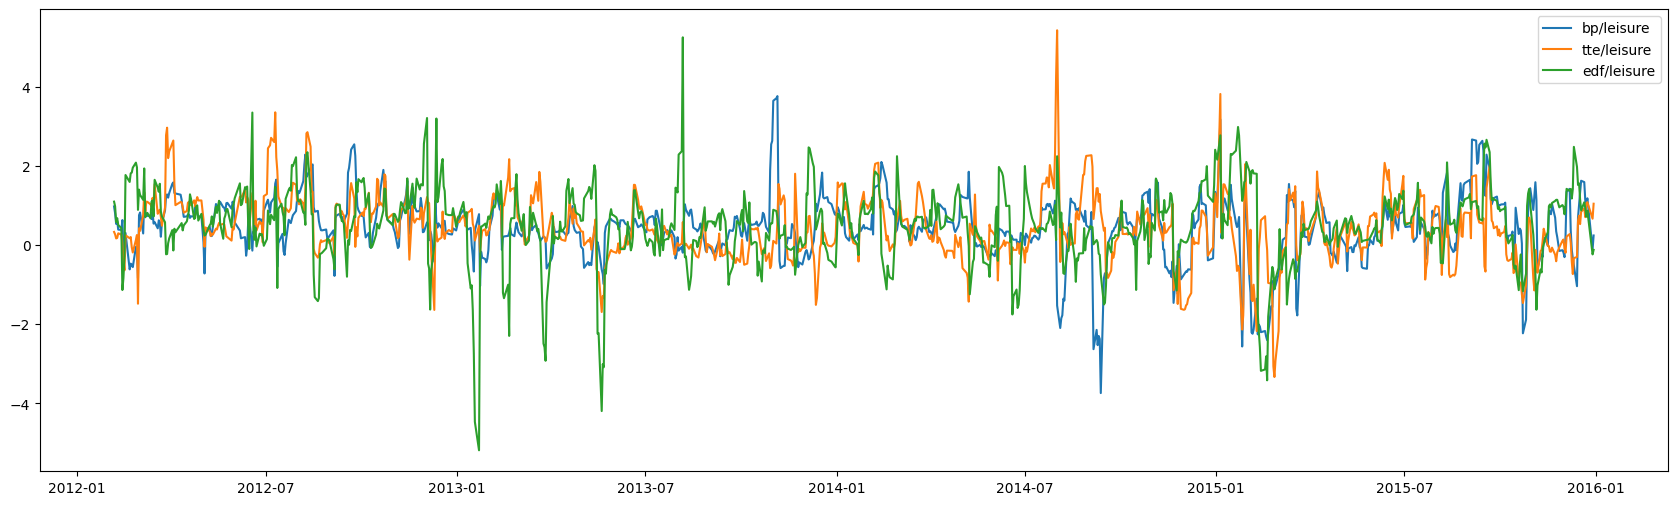

In [88]:
plt.figure(figsize=(21, 6))
plt.plot(rolling_beta.date, rolling_beta['bp/leisure'], label='bp/leisure')
plt.plot(rolling_beta.date, rolling_beta['tte/leisure'], label='tte/leisure')
plt.plot(rolling_beta.date, rolling_beta['edf/leisure'], label='edf/leisure')
plt.legend()